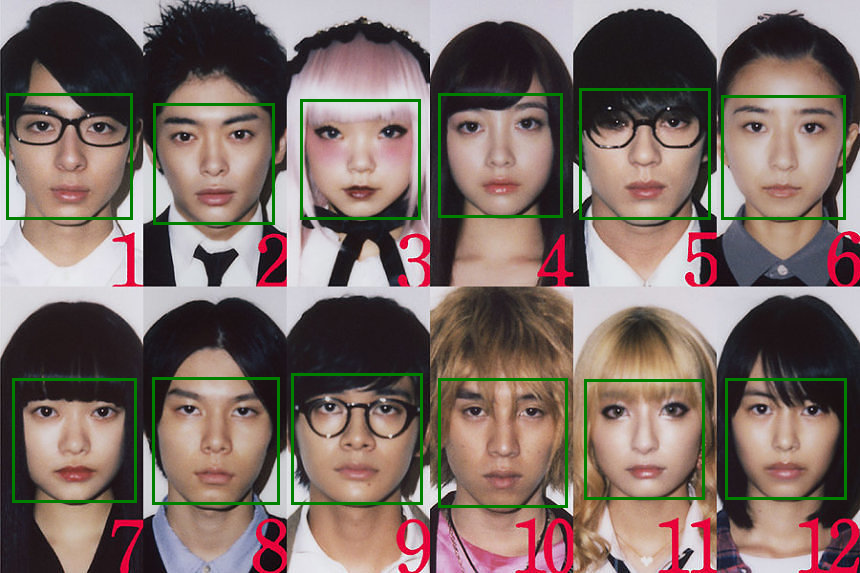

In [30]:
import requests
from PIL import Image, ImageDraw
import io

SUBSCRIPTION_KEY = "23a6bfb024034974b0c696b723f03e12"
assert SUBSCRIPTION_KEY

face_api_url = "https://20201219sato.cognitiveservices.azure.com/face/v1.0/detect"

img = Image.open("人.jpg")

with open("人.jpg", "rb") as f:
    binary_img = f.read()
       
headers = {
    "Content-Type": "application/octet-stream",
    "Ocp-Apim-Subscription-Key": SUBSCRIPTION_KEY
}
params = {
    "returnFaceId": "true",
    "returnFaceAttributes": "age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure, noise",
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

results = res.json()

for result in results:
    rect = result["faceRectangle"]
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect["left"], rect["top"]), (rect["left"]+rect["width"], rect["top"]+rect["height"])], fill=None, outline="green", width=3)